<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-count-the-objects-using-ultralytics-yolo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  
  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Object counting using Ultralytics YOLO11 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Object Counting using Ultralytics YOLO11

This notebook serves as a starting point for [counting objects](https://docs.ultralytics.com/guides/object-counting/) in videos or live streams using the YOLO11 model.

### What is Object Counting?

- Object counting with YOLO11 involves accurate identification and counting of specific objects in videos and camera streams. YOLO11 excels in real-time applications, providing efficient and precise object counting for various scenarios like crowd analysis and surveillance, thanks to its state-of-the-art algorithms and deep learning capabilities.

### Advantages of Object Counting?

- **Resource Optimization**: Object counting facilitates efficient resource management by providing accurate counts, and optimizing resource allocation in applications like inventory management.
- **Enhanced Security**: Object counting enhances security and surveillance by accurately tracking and counting entities, aiding in proactive threat detection.
- **Informed Decision-Making**: Object counting offers valuable insights for decision-making, optimizing processes in retail, traffic management, and various other domains.

### Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://clickpy.clickhouse.com/dashboard/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [2]:
!uv pip install ultralytics

import ultralytics
import cv2
from ultralytics.utils.downloads import safe_download
from ultralytics import solutions

ultralytics.checks()

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.1/112.6 GB disk)


### Read the Video File

- You can either read the video file directly or stream the content from an RTSP (Real-Time Streaming Protocol) source, allowing for flexible video input depending on your needs.
- We will also set up the video writer to handle the output video writing.

In [24]:
safe_download("https://github.com/ultralytics/notebooks/releases/download/v0.0.0/solutions-ci-demo.mp4")
cap = cv2.VideoCapture("/content/3669014919-preview.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
                                       cv2.CAP_PROP_FRAME_HEIGHT,
                                       cv2.CAP_PROP_FPS))

# Video writer
video_writer = cv2.VideoWriter("counting.avi",
                               cv2.VideoWriter_fourcc(*"mp4v"),
                               fps, (w, h))

### Define Region Coordinates

Here, we set the coordinates for specific regions to ensure accurate object tracking and analysis within the video or stream. This helps monitor and count objects effectively in different areas.

In [25]:
# Define region points
# region_points = [(20, 400), (1080, 400)]  # For line counting
region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # For rectangle region counting
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]  # For polygon region counting

### Initialize the ObjectCounter Class

- Now, let's initialize the `ObjectCounter` class to track and count objects in each frame of the video.

In [26]:
# Init ObjectCounter
counter = solutions.ObjectCounter(
    show=True,  # Display the output
    region=region_points,  # Pass region points
    model="yolo11n.pt",  # model="yolo11n-obb.pt" for object counting using YOLO11 OBB model.
    # classes=[0, 2],  # If you want to count specific classes i.e person and car with COCO pretrained model.
    # show_in=True,  # Display in counts
    # show_out=True,  # Display out counts
    # line_width=2,  # Adjust the line width for bounding boxes and text display
)

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11n.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': [(20, 400), (1080, 400), (1080, 360), (20, 360)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}


### Process Video Frames

In this step, we will process each frame of the video to detect and analyze objects. This allows for real-time tracking and counting, based on the visual data in the frames.

In [27]:
from google.colab.patches import cv2_imshow

In [19]:
from IPython.display import Video
Video("/content/3669014919-preview.mp4", embed=True)

![Fish Counting in the Sea Using Ultralytics YOLO11](https://github.com/ultralytics/docs/releases/download/0/conveyor-belt-packets-counting.avif)

Crafted with 💙 by [Ultralytics](https://ultralytics.com/)  

🌟 Explore and star the [Ultralytics Notebooks](https://github.com/ultralytics/notebooks/) to supercharge your AI journey! 🚀

# Task
Fix the `cv2_imshow` call to only pass the image array (`results.plot_im`) as an argument.

0: 506x898 1.4ms, 10 donut
Speed: 87.5ms track, 1.4ms solution per image at shape (1, 3, 506, 898)

1: 506x898 2.0ms, 10 donut
Speed: 40.4ms track, 2.0ms solution per image at shape (1, 3, 506, 898)

2: 506x898 2.0ms, 8 donut, 1 keyboard
Speed: 43.9ms track, 2.0ms solution per image at shape (1, 3, 506, 898)

3: 506x898 1.6ms, 6 donut, 1 keyboard
Speed: 35.6ms track, 1.6ms solution per image at shape (1, 3, 506, 898)

4: 506x898 1.6ms, 8 donut
Speed: 34.8ms track, 1.6ms solution per image at shape (1, 3, 506, 898)

5: 506x898 1.7ms, 8 donut
Speed: 40.1ms track, 1.7ms solution per image at shape (1, 3, 506, 898)

6: 506x898 3.3ms, 10 donut
Speed: 38.1ms track, 3.3ms solution per image at shape (1, 3, 506, 898)

7: 506x898 2.0ms, 10 donut
Speed: 45.5ms track, 2.0ms solution per image at shape (1, 3, 506, 898)

8: 506x898 1.5ms, 7 donut
Speed: 34.4ms track, 1.5ms solution per image at shape (1, 3, 506, 898)

9: 506x898 2.0ms, 10 donut
Speed: 36.0ms track, 2.0ms solution per image at shape

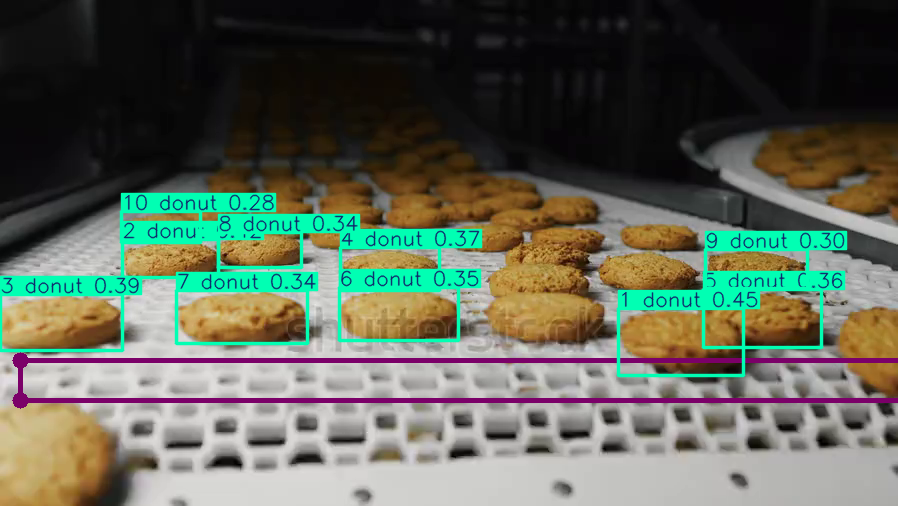

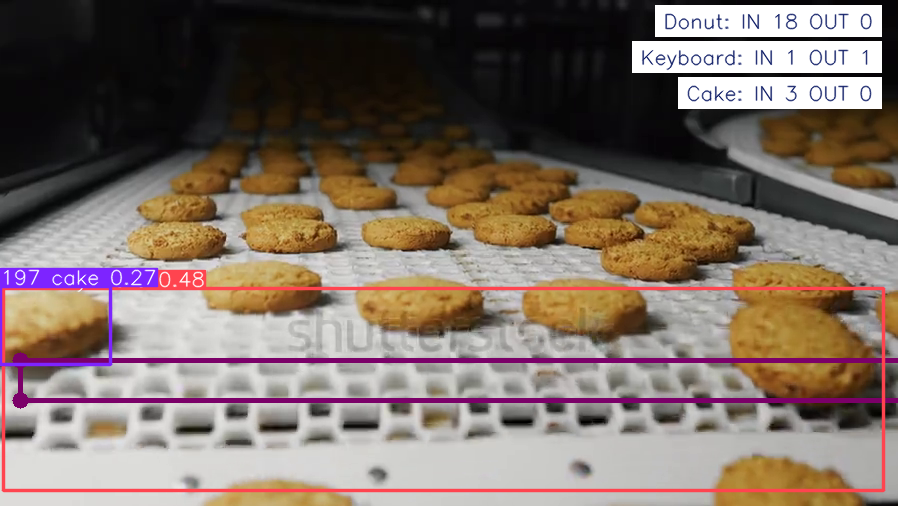

In [28]:
first_frame = None
last_frame = None

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = counter(im0)  # count the objects
    video_writer.write(results.plot_im)   # write the video frames

    # Store the first frame
    if first_frame is None:
        first_frame = results.plot_im

    # Always update last_frame
    last_frame = results.plot_im

cap.release()   # Release the capture
video_writer.release()

# Show the first output
cv2_imshow(first_frame)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()

# Show the last output
cv2_imshow(last_frame)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()


In [23]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = counter(im0)  # count the objects
    video_writer.write(results.plot_im)   # write the video frames

    # Visualize the frame in a window
    cv2_imshow(results.plot_im)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()   # Release the capture
video_writer.release()
cv2.destroyAllWindows()